In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from zipfile import ZipFile
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from keras.preprocessing import timeseries_dataset_from_array as ts_split
from keras import layers as kl

In [336]:
# Open the pickle file
df = pickle.load(open('../../data/processed/merged_data_202506101838.pkl', 'rb'))
df

,AAL_%Chg,ALGT_%Chg,ALK_%Chg,DAL_%Chg,ITA_%Chg,IYT_%Chg,JBLU_%Chg,JETS_%Chg,LUV_%Chg,UAL_%Chg,...,month_of_year_10,month_of_year_11,month_of_year_12,hour_of_day_9,hour_of_day_10,hour_of_day_11,hour_of_day_12,hour_of_day_13,hour_of_day_14,hour_of_day_15
Time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:30:00,0.13,0.52,1.31,0.31,0.08,0.80,0.13,0.68,0.49,0.43,...,False,False,False,True,False,False,False,False,False,False
2018-01-02 09:45:00,0.19,-0.88,0.05,-0.13,-0.12,0.07,-0.25,-0.04,0.43,-0.25,...,False,False,False,True,False,False,False,False,False,False
2018-01-02 10:00:00,-0.08,1.09,0.18,0.22,0.17,0.23,0.27,0.32,-0.18,0.13,...,False,False,False,False,True,False,False,False,False,False
2018-01-02 10:15:00,0.02,-0.03,0.20,0.03,-0.16,-0.29,-0.38,-0.01,-0.27,0.28,...,False,False,False,False,True,False,False,False,False,False
2018-01-02 10:30:00,0.04,-0.74,0.05,0.30,-0.18,-0.09,-0.04,-0.08,0.30,0.24,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30 14:45:00,0.22,0.13,0.09,0.02,0.10,0.12,0.39,0.09,0.12,0.29,...,False,False,False,False,False,False,False,False,True,False
2025-05-30 15:00:00,0.09,-0.03,-0.09,0.21,0.11,0.02,-0.39,0.07,0.21,0.05,...,False,False,False,False,False,False,False,False,False,True
2025-05-30 15:15:00,0.26,0.21,0.24,0.35,0.22,0.18,0.29,0.22,0.21,0.49,...,False,False,False,False,False,False,False,False,False,True


In [337]:
list(df.columns)

['AAL_%Chg',
 'ALGT_%Chg',
 'ALK_%Chg',
 'DAL_%Chg',
 'ITA_%Chg',
 'IYT_%Chg',
 'JBLU_%Chg',
 'JETS_%Chg',
 'LUV_%Chg',
 'UAL_%Chg',
 'AAL_Change',
 'ALGT_Change',
 'ALK_Change',
 'DAL_Change',
 'ITA_Change',
 'IYT_Change',
 'JBLU_Change',
 'JETS_Change',
 'LUV_Change',
 'UAL_Change',
 'AAL_High',
 'ALGT_High',
 'ALK_High',
 'DAL_High',
 'ITA_High',
 'IYT_High',
 'JBLU_High',
 'JETS_High',
 'LUV_High',
 'UAL_High',
 'AAL_High-Low',
 'ALGT_High-Low',
 'ALK_High-Low',
 'DAL_High-Low',
 'ITA_High-Low',
 'IYT_High-Low',
 'JBLU_High-Low',
 'JETS_High-Low',
 'LUV_High-Low',
 'UAL_High-Low',
 'AAL_High-Low%',
 'ALGT_High-Low%',
 'ALK_High-Low%',
 'DAL_High-Low%',
 'ITA_High-Low%',
 'IYT_High-Low%',
 'JBLU_High-Low%',
 'JETS_High-Low%',
 'LUV_High-Low%',
 'UAL_High-Low%',
 'AAL_Last',
 'ALGT_Last',
 'ALK_Last',
 'DAL_Last',
 'ITA_Last',
 'IYT_Last',
 'JBLU_Last',
 'JETS_Last',
 'LUV_Last',
 'UAL_Last',
 'AAL_Last-Open',
 'ALGT_Last-Open',
 'ALK_Last-Open',
 'DAL_Last-Open',
 'ITA_Last-Open',
 

In [338]:
df.filter(like='AAL').columns

Index(['AAL_%Chg', 'AAL_Change', 'AAL_High', 'AAL_High-Low', 'AAL_High-Low%',
       'AAL_Last', 'AAL_Last-Open', 'AAL_Last-Open%', 'AAL_Last_Lag1',
       'AAL_Last_Lag10', 'AAL_Last_Lag11', 'AAL_Last_Lag12', 'AAL_Last_Lag2',
       'AAL_Last_Lag3', 'AAL_Last_Lag4', 'AAL_Last_Lag5', 'AAL_Last_Lag6',
       'AAL_Last_Lag7', 'AAL_Last_Lag8', 'AAL_Last_Lag9', 'AAL_LogReturn',
       'AAL_Low', 'AAL_MA12_Last', 'AAL_MA12_Last_Lag1', 'AAL_MA12_Last_Lag10',
       'AAL_MA12_Last_Lag11', 'AAL_MA12_Last_Lag12', 'AAL_MA12_Last_Lag2',
       'AAL_MA12_Last_Lag3', 'AAL_MA12_Last_Lag4', 'AAL_MA12_Last_Lag5',
       'AAL_MA12_Last_Lag6', 'AAL_MA12_Last_Lag7', 'AAL_MA12_Last_Lag8',
       'AAL_MA12_Last_Lag9', 'AAL_MA4_Last', 'AAL_MA4_Last_Lag1',
       'AAL_MA4_Last_Lag10', 'AAL_MA4_Last_Lag11', 'AAL_MA4_Last_Lag12',
       'AAL_MA4_Last_Lag2', 'AAL_MA4_Last_Lag3', 'AAL_MA4_Last_Lag4',
       'AAL_MA4_Last_Lag5', 'AAL_MA4_Last_Lag6', 'AAL_MA4_Last_Lag7',
       'AAL_MA4_Last_Lag8', 'AAL_MA4_Last_L

In [339]:
df.filter(like='%Chg').columns

Index(['AAL_%Chg', 'ALGT_%Chg', 'ALK_%Chg', 'DAL_%Chg', 'ITA_%Chg', 'IYT_%Chg',
       'JBLU_%Chg', 'JETS_%Chg', 'LUV_%Chg', 'UAL_%Chg'],
      dtype='object')

In [340]:
# Data preprocessing
y_cols = ['AAL_Change']
#x_cols = ['AAL_Change']
x_cols = [
        'AAL_Change',
       #'AAL_%Chg', 'AAL_Change', 'AAL_High', 'AAL_High-Low', 'AAL_High-Low%',
       #'AAL_Last', 'AAL_Last-Open', 'AAL_Last-Open%', 'AAL_Open',
       #'AAL_Roll_SDSD_Last_10', 'AAL_Roll_SDSD_Volume_10',
       #'AAL_Roll_SD_Last_10', 'AAL_Roll_SD_Volume_10', 'AAL_Volume',
       #'PCA_GKG1_0_AAL_rolling_sum26','PCA_GKG1_0_AAL_rolling_mean26', 
       #'PCA_GKG1_1_AAL_rolling_sum26','PCA_GKG1_1_AAL_rolling_mean26', 
       #'PCA_GKG1_2_AAL_rolling_sum26','PCA_GKG1_2_AAL_rolling_mean26', 
       #'PCA_GKG1_3_AAL_rolling_sum26','PCA_GKG1_3_AAL_rolling_mean26', 
       #'Article Count_AAL_rolling_sum26','Article Count_AAL_rolling_mean26',
       'day_of_week_0','day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4',
       'month_of_year_1','month_of_year_2','month_of_year_3','month_of_year_4','month_of_year_5','month_of_year_6','month_of_year_7','month_of_year_8','month_of_year_9','month_of_year_10','month_of_year_11','month_of_year_12',
       'hour_of_day_9','hour_of_day_10','hour_of_day_11','hour_of_day_12','hour_of_day_13','hour_of_day_14','hour_of_day_15'
       ]

y = df[y_cols]
x = df[x_cols]

In [341]:
# Train/text splitting
split_val  = round(0.7 * len(x))
split_test = round(0.9 * len(x))

x_train = x[:split_val]
x_val   = x[split_val:split_test]
x_test  = x[split_test:]

y_train = y[:split_val]
y_val   = y[split_val:split_test]
y_test  = y[split_test:]

In [342]:
# Normalize the features to [0,1]
#sc2 = MinMaxScaler(feature_range=(0, 1))

#x_train = sc2.fit_transform(x_train)
#x_val   = sc2.transform(x_val)
#x_test  = sc2.transform(x_test)

In [343]:
def create_tensor(data, type:str, steps_historical=26, steps_future=6, skiprows=1):
    # Need to fix skiprows to make the output data shorter

    tot_length = len(data) - steps_historical - steps_future + 1

    if type.lower() == 'x':
        x_tensor = np.zeros(shape=(tot_length, steps_historical, data.shape[1]))
        for i in range(0, tot_length, skiprows):
            j = i + steps_historical
            x_tensor[i] = data[i:j]
        return x_tensor
    
    elif type.lower() == 'y':
        y_tensor = np.zeros(shape=(tot_length, steps_future, data.shape[1]))
        for i in range(0, tot_length, skiprows):
            j = i + steps_historical
            k = j + steps_future
            y_tensor[i] = data[j:k]
        return y_tensor
    
    else:
        raise ValueError("Type must be 'x' or 'y'.")

In [344]:
steps_historical = 12
steps_future = 1

x_tensor_train = create_tensor(x_train, type='x', steps_historical=steps_historical, steps_future=steps_future)
x_tensor_test  = create_tensor(x_test , type='x', steps_historical=steps_historical, steps_future=steps_future)
x_tensor_val   = create_tensor(x_val  , type='x', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_train = create_tensor(y_train, type='y', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_test  = create_tensor(y_test , type='y', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_val   = create_tensor(y_val  , type='y', steps_historical=steps_historical, steps_future=steps_future)

In [345]:
for i in ['x_tensor_train', 'x_tensor_test', 'x_tensor_val', 'y_tensor_train', 'y_tensor_test', 'y_tensor_val']:
    print(f"{i} shape: {eval(i).shape}")

x_tensor_train shape: (33784, 12, 25)
x_tensor_test shape: (4816, 12, 25)
x_tensor_val shape: (9644, 12, 25)
y_tensor_train shape: (33784, 1, 1)
y_tensor_test shape: (4816, 1, 1)
y_tensor_val shape: (9644, 1, 1)


In [354]:
# Calculate the loss on a Naive model: predict 0 change as the next value
naive_mae_train = np.nanmean(np.abs(0 - y_tensor_train[:, -1, 0]))
naive_mae_val = np.mean(np.abs(0 - y_tensor_val[:, -1, 0]))

print(f"Naive model MAE on training data: {naive_mae_train:.6f}")
print(f"Naive model MAE on validation data: {naive_mae_val:.6f}")

Naive model MAE on training data: 0.084910
Naive model MAE on validation data: 0.037321


In [355]:
# Custom loss function to report MAE divided by naive_mae_val
def custom_loss(y_true, y_pred):
    mae = keras.losses.mean_absolute_error(y_true, y_pred)
    return mae / naive_mae_val

In [360]:
# Designing the model structure
kern = steps_historical-steps_future+1

model = keras.Sequential([
    kl.Input(shape=(steps_historical, len(x_cols))),
    kl.LSTM(20, return_sequences=True),
    kl.Conv1D(10, kernel_size=kern),
    kl.Dense(1)
])

model.compile(
    optimizer = 'rmsprop', 
    loss = custom_loss
    )
model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 12, 20)         │         3,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_24 (Conv1D)              │ (None, 1, 10)          │         2,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1, 1)           │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,101 (23.83 KB)

 Trainable params: 6,101 (23.83 KB)

 Non-trainable params: 0 (0.00 B)

In [361]:
# This will monitor validation loss and stop training if it doesn't improve after 5 epochs
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

history = model.fit(
    x_tensor_train, 
    y_tensor_train,
    validation_data = (x_tensor_val, y_tensor_val),
    steps_per_epoch= round(len(x_tensor_train)/100),
    epochs = 100, 
    verbose = 1,
    batch_size = None,
    callbacks = [es_callback],
    shuffle=True)

Epoch 1/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.4994 - val_loss: 1.1092
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3337 - val_loss: 1.0811
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3087 - val_loss: 1.0193
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2768 - val_loss: 1.0210
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2844 - val_loss: 1.0145
Epoch 6/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2852 - val_loss: 1.0134
Epoch 7/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3098 - val_loss: 1.0145
Epoch 8/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2767 - val_loss: 1.0149
Epoch 9/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2562 - val_loss: 1.0114
Epoch 10/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2866 - val_loss: 1.0094
Epoch 11/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2643 - val_loss: 1.0067
Epoch 12/100
338/338 ━━━━━━━━━━━━━━━━━━━━

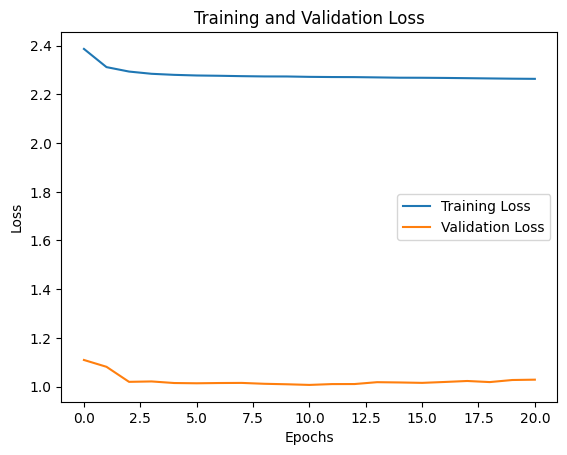

In [362]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

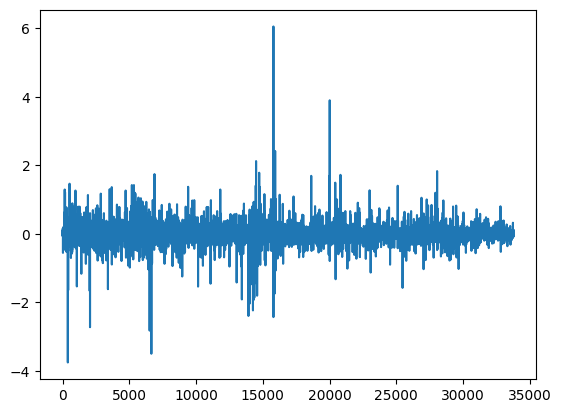

In [271]:
# Transform y_tensor_val from shape (9633, 12, 1) to (9633, 12)
y_tensor_train = y_tensor_train.reshape(y_tensor_train.shape[0], y_tensor_train.shape[1])
plt.plot(pd.DataFrame(y_tensor_train).iloc[:,0].to_frame())

In [252]:
# Reshape y tensors for single-step prediction
# y_tensor_train, y_tensor_val, y_tensor_test: (samples, 1, 1) -> (samples, 1)
y_tensor_train = y_tensor_train.reshape(y_tensor_train.shape[0], y_tensor_train.shape[1])
y_tensor_val = y_tensor_val.reshape(y_tensor_val.shape[0], y_tensor_val.shape[1])
y_tensor_test = y_tensor_test.reshape(y_tensor_test.shape[0], y_tensor_test.shape[1])

In [273]:
# Simple Dense model for baseline comparison
simple_model = keras.Sequential([
    kl.Input(shape=(steps_historical, len(x_cols))),
    kl.Flatten(),
    kl.Dense(1)
])

simple_model.compile(optimizer='rmsprop', loss='mae')
simple_model.summary()

# Train the simple model
simple_history = simple_model.fit(
    x_tensor_train,
    y_tensor_train,
    validation_data=(x_tensor_val, y_tensor_val),
    epochs=10,
    verbose=1,
    callbacks=[es_callback]
)

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - loss: 0.1423 - val_loss: 0.0400
Epoch 2/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - loss: 0.1423 - val_loss: 0.0400
Epoch 2/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - loss: 0.0888 - val_loss: 0.0374
Epoch 3/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - loss: 0.0888 - val_loss: 0.0374
Epoch 3/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - loss: 0.0852 - val_loss: 0.0379
Epoch 4/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - loss: 0.0852 - val_loss: 0.0379
Epoch 4/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 0.0848 - val_loss: 0.0374
Epoch 5/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 0.0848 - val_loss: 0.0374
Epoch 5/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - loss: 0.0850 - val_loss: 0.0377
Epoch 6/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - loss: 0.0850 - val_loss: 0.0377
Epoch 6/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - loss: 0.0851 - val_loss: 0.0375
Epoch 7/10

In [254]:
x_tensor_val[:, -1, 0].reshape(-1, 1)

array([[-0.12],
       [ 0.06],
       [ 0.61],
       ...,
       [-0.48],
       [-0.1 ],
       [ 0.13]])

In [255]:
y_tensor_val

array([[ 0.06],
       [ 0.61],
       [ 0.15],
       ...,
       [-0.1 ],
       [ 0.13],
       [-0.32]])